In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data=load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
df_wine=pd.DataFrame(data['data'],columns=data['feature_names'])
df_cwine=df_wine.copy()
df_wine['wine_class']=data['target']
#df_wine['wine_class_names']=pd.Categorical.from_codes(data.target, data.target_names)
df_wine['wine_class_names']=df_wine.wine_class.replace(dict(enumerate(data.target_names)))
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,wine_class_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [4]:
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'wine_class',
       'wine_class_names'],
      dtype='object')

In [5]:
df_wine.describe

<bound method NDFrame.describe of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  

In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [7]:
lmedian=[]
for i in df_cwine.columns.values:
  lmedian.append(np.median(df_cwine[i]))
lmedian

[13.05,
 1.8650000000000002,
 2.36,
 19.5,
 98.0,
 2.355,
 2.135,
 0.34,
 1.5550000000000002,
 4.6899999999999995,
 0.965,
 2.78,
 673.5]

In [8]:
df_cwine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


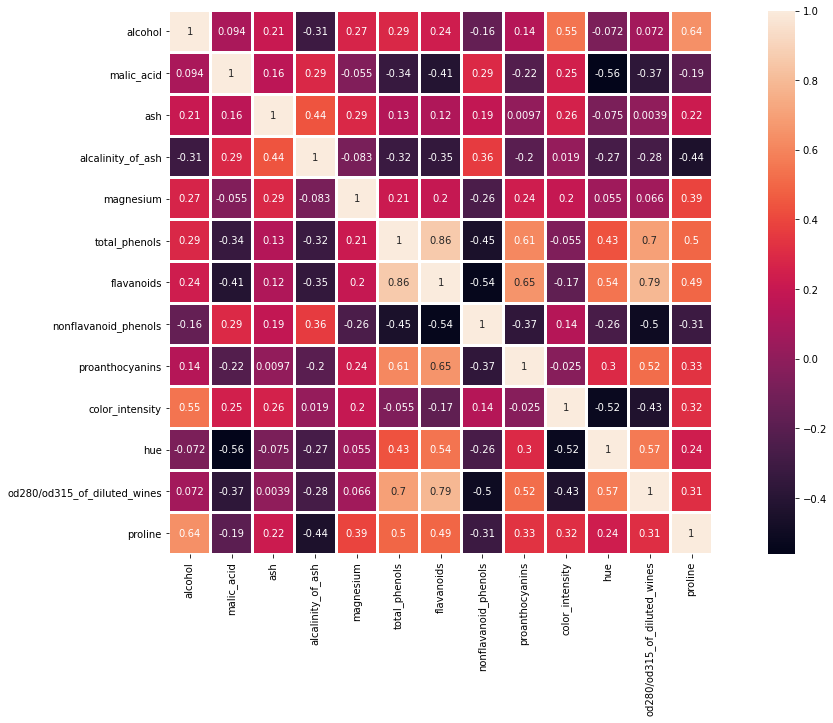

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df_wine.iloc[:,:13].corr(),annot=True, linewidths=2, square=True)

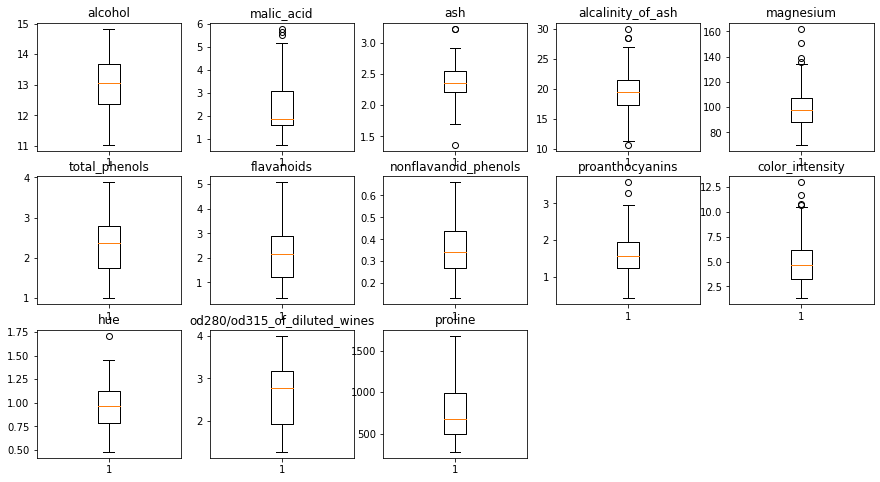

In [13]:
plt.figure(figsize=(15,8))
for i, column in enumerate(df_cwine.columns.values,1):
    plt.subplot(3,5,i)
    plt.boxplot(df_cwine[column])
    plt.title(column)
plt.show()

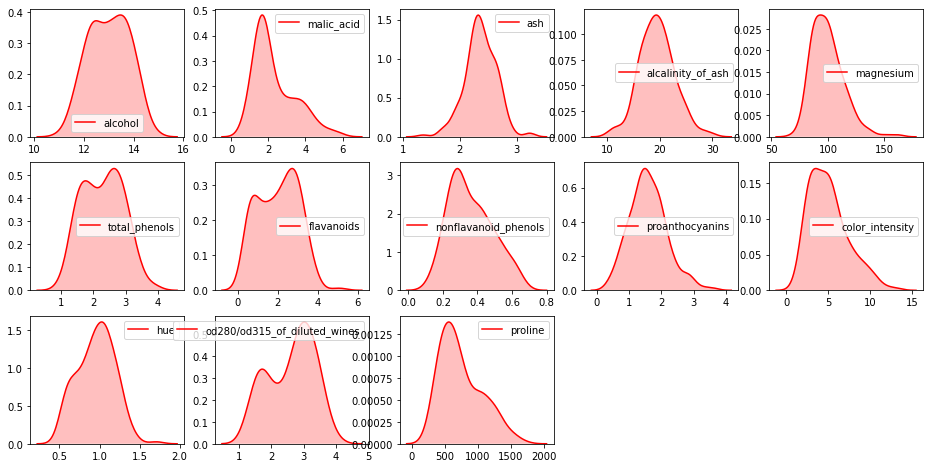

In [14]:
plt.figure(figsize=(16,8))
for i, column in enumerate(df_cwine.columns.values,1):
    plt.subplot(3,5,i)
    sns.kdeplot(df_cwine[column],color='r',shade=True)
plt.show()

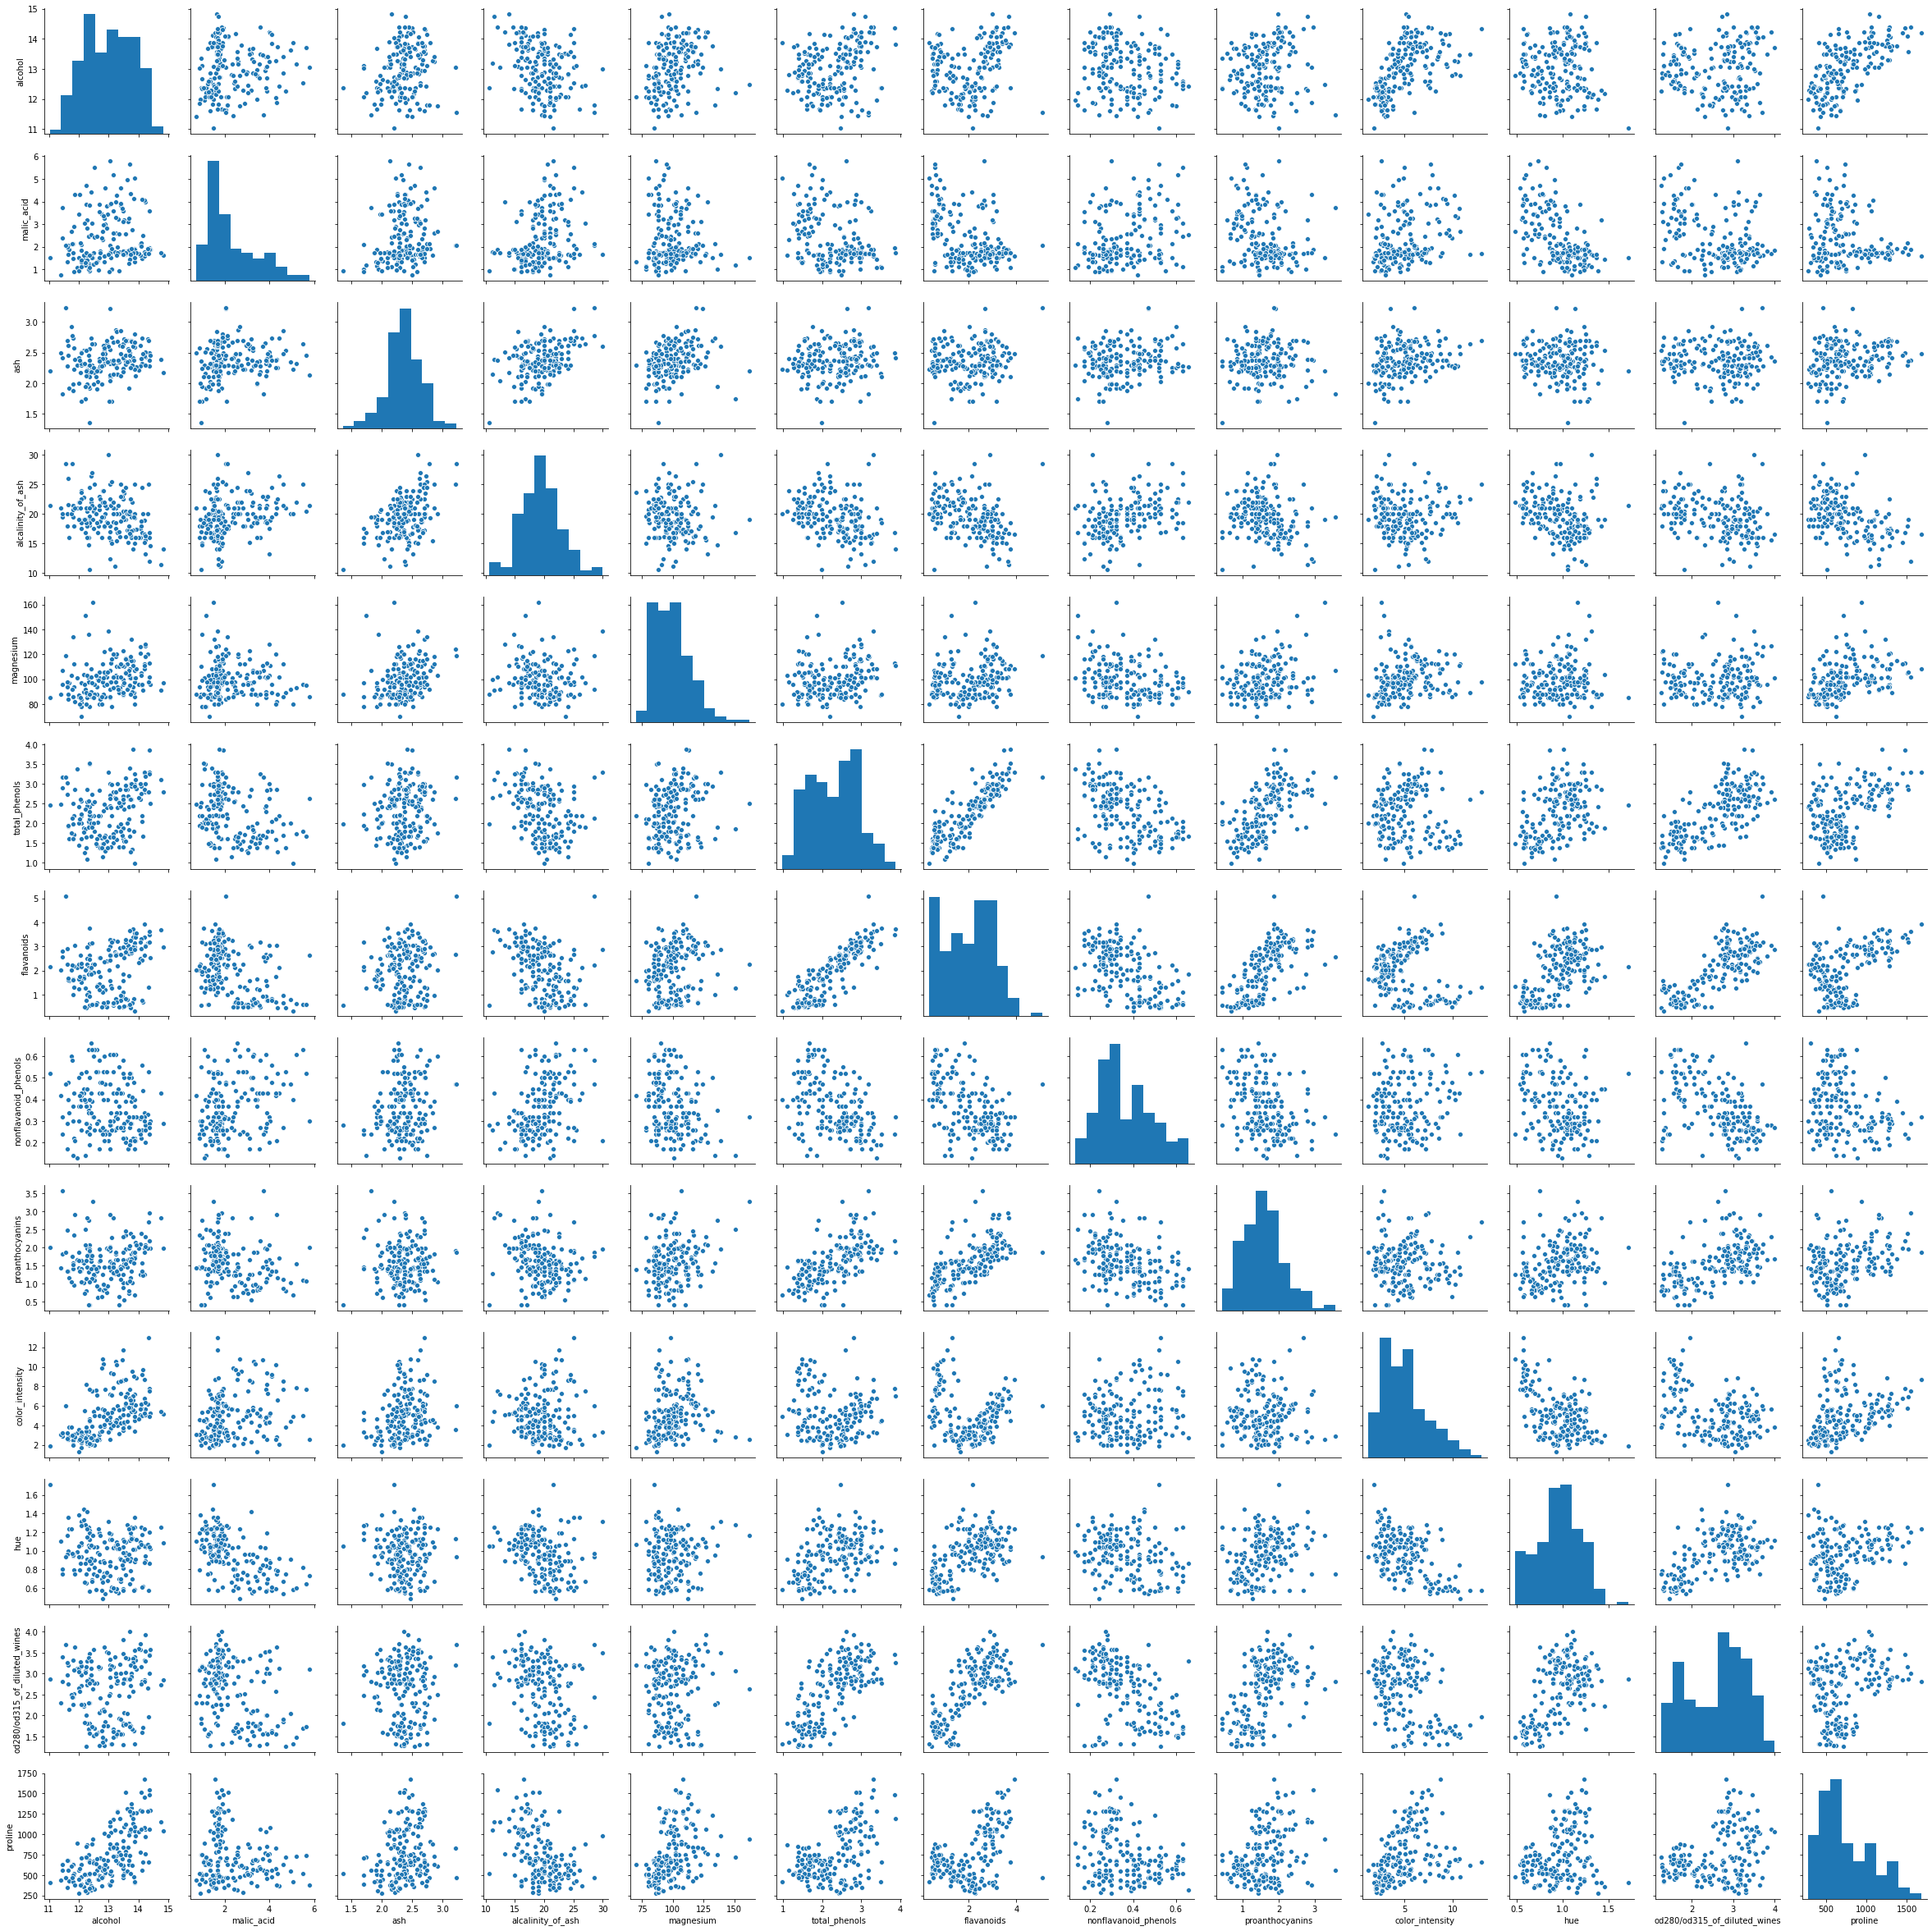

In [15]:
sns.pairplot(df_cwine)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df_wine.iloc[:,1:13],df_wine.iloc[:,13],test_size=0.3,random_state=31)

In [17]:
x_train.shape,y_train.shape

((124, 12), (124,))

In [18]:
x_test.shape,y_test.shape

((54, 12), (54,))

In [19]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

In [22]:
train_acc=accuracy_score(y_train,train_pred)
test_acc=accuracy_score(y_test,test_pred)

In [23]:
train_acc,test_acc

(1.0, 0.8703703703703703)

[Text(279.0, 498.3, 'X[11] <= 755.0\ngini = 0.656\nsamples = 124\nvalue = [42, 50, 32]'),
 Text(139.5, 407.70000000000005, 'X[5] <= 1.025\ngini = 0.475\nsamples = 76\nvalue = [1, 48, 27]'),
 Text(69.75, 317.1, 'X[8] <= 2.9\ngini = 0.08\nsamples = 24\nvalue = [0, 1, 23]'),
 Text(34.875, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(104.625, 226.5, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]'),
 Text(209.25, 317.1, 'X[9] <= 0.65\ngini = 0.177\nsamples = 52\nvalue = [1, 47, 4]'),
 Text(174.375, 226.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(244.125, 226.5, 'X[1] <= 2.8\ngini = 0.041\nsamples = 48\nvalue = [1, 47, 0]'),
 Text(209.25, 135.89999999999998, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(279.0, 135.89999999999998, 'X[4] <= 2.275\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(244.125, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(313.875, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text

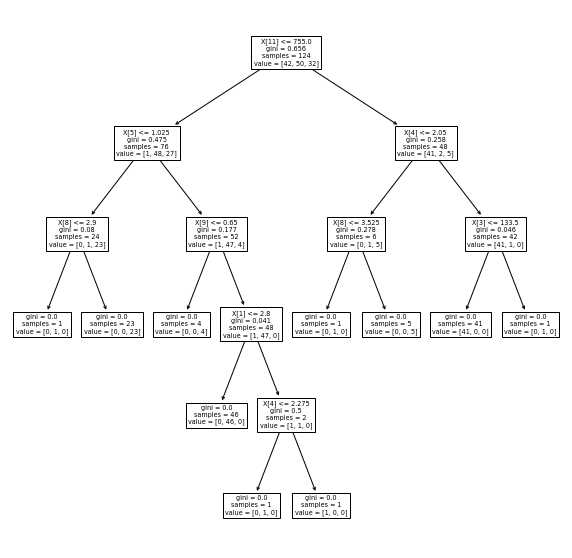

In [24]:
plt.figure(figsize=(10,10))
plot_tree(model)

In [25]:
param={'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8]}
model_cv=GridSearchCV(model,param_grid=param)
model_cv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [26]:
model_cv.best_score_

0.9356666666666665

In [27]:
model_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)